## HDDM Analysis of raw reaction times


Models for Drit-Rate (v) and Bias (z) dependent on main effects (Stim and Level) and Conditions
--> 6 Models are estimated

-----
         Main effects:                                Conditions:
----
       Stim:
        - happy                                     - happy 8ms
        - sad                                       - happy 16ms
        - neutral                                   - happy 25ms
                                                    - happy 141ms
        Level:                                      - sad 8ms
        - 141ms                                     - sad 16ms
        - 25ms                                      - sad 25ms
        - 16ms                                      - sad 141ms
        - 8ms                                       - neutral 8ms
                                                    - neutral 16ms
                                                    - neutral 25ms
                                                    - neutral 141ms
                                                    
                                                    

In [52]:
#Load in packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import hddm
print (hddm.__version__)

0.6.0


In [53]:
#Load in dataset
data = hddm.load_csv('C:/Users/juhoffmann/OneDrive - Uniklinik RWTH Aachen/Auswertung/Pilot/hddm/hddm_study_1_and_2_alltrials.csv')
data = data.drop(['Unnamed: 0'], axis=1) #Drop unnecessary column
data = data.dropna(subset=['rt'])        #Delete NAN
data.head(10)                            #View first 10 rows of dataset

# rename columns
data.rename(columns = {'response':'key_pressed'}, inplace = True) 
data.rename(columns = {'correct':'response'}, inplace = True) 

data['subj_idx'] = data['subj_idx'].replace(['0HZ'],'005')
data['subj_idx'] = data['subj_idx'].astype(float)
data.head(10)
#data.describe()



,subj_idx,rt,response,key_pressed,stim,level,real_trial_number,trial,block,conditions,study_number,primer_time
0,42.0,1.247361,1.0,8.0,neutral,141ms,8.0,7.0,0.0,141ms_neutral,study2,0.149150
1,42.0,1.104279,1.0,9.0,happy,25ms,10.0,9.0,0.0,25ms_happy,study2,0.024608
2,42.0,1.366507,1.0,9.0,happy,141ms,11.0,10.0,0.0,141ms_happy,study2,0.149679
3,42.0,1.189963,1.0,7.0,sad,141ms,13.0,12.0,0.0,141ms_sad,study2,0.149711
4,42.0,1.407712,1.0,9.0,happy,25ms,15.0,14.0,0.0,25ms_happy,study2,0.024650
5,42.0,1.015348,1.0,8.0,neutral,25ms,17.0,16.0,0.0,25ms_neutral,study2,0.024483
6,42.0,0.885878,1.0,8.0,neutral,141ms,18.0,17.0,0.0,141ms_neutral,study2,0.149314
7,42.0,1.096443,1.0,9.0,happy,25ms,19.0,18.0,0.0,25ms_happy,study2,0.024781
8,42.0,1.123209,1.0,9.0,happy,141ms,20.0,19.0,0.0,141ms_happy,study2,0.149952
9,42.0,1.043310,1.0,9.0,happy,16ms,23.0,22.0,0.0,16ms_happy,study2,0.016038


In [54]:
#delete unnecessary columns
del data['key_pressed']
del data['real_trial_number']
del data['trial']
del data['block']
del data['study_number']
del data['primer_time']
data.head(10)


,subj_idx,rt,response,stim,level,conditions
0,42.0,1.247361,1.0,neutral,141ms,141ms_neutral
1,42.0,1.104279,1.0,happy,25ms,25ms_happy
2,42.0,1.366507,1.0,happy,141ms,141ms_happy
3,42.0,1.189963,1.0,sad,141ms,141ms_sad
4,42.0,1.407712,1.0,happy,25ms,25ms_happy
5,42.0,1.015348,1.0,neutral,25ms,25ms_neutral
6,42.0,0.885878,1.0,neutral,141ms,141ms_neutral
7,42.0,1.096443,1.0,happy,25ms,25ms_happy
8,42.0,1.123209,1.0,happy,141ms,141ms_happy
9,42.0,1.043310,1.0,happy,16ms,16ms_happy


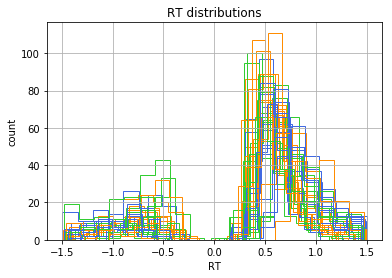

In [108]:
#Draw reaction time distributions
data = hddm.utils.flip_errors(data)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('hddm_rt_distribution.pdf')

In [56]:
data.head(10)
data.describe()

,subj_idx,rt,response
count,11454.000000,11454.000000,11454.000000
mean,22.437664,0.401547,0.815261
std,14.138255,0.635964,0.388103
min,1.000000,-1.495898,0.000000
25%,9.000000,0.392150,1.000000
50%,21.000000,0.567259,1.000000
75%,34.000000,0.761230,1.000000
max,48.000000,1.499959,1.000000


# Model for drift-rate depending on conditions
### Gelman Rubin R Statistic for convergence check


In [57]:
models = list()
for i in range(5): #Estimate Model 5 times
    m = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'conditions'})  #Drift-rate v dependent on 12 conditions
    m.find_starting_values() 
    m.sample(2000, burn=20,dbname='v_conditions.db',db='pickle')  #Draw 2.000 samples, burn first20
    models.append(m)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains

 [-----------------100%-----------------] 2000 of 2000 complete in 410.8 sec

{'a': 1.0005766294738818,
 'a_std': 1.0017390182165509,
 'a_subj.1.0': 1.001584262597904,
 'a_subj.10.0': 1.0003406240750987,
 'a_subj.11.0': 1.0003391815636014,
 'a_subj.14.0': 1.0003963921453207,
 'a_subj.15.0': 1.0001563427964586,
 'a_subj.16.0': 1.0007270684101244,
 'a_subj.17.0': 1.0024746722175766,
 'a_subj.18.0': 1.0000932320018576,
 'a_subj.2.0': 1.0001365638982678,
 'a_subj.20.0': 1.0014514424915273,
 'a_subj.21.0': 1.0007730268015937,
 'a_subj.22.0': 1.0001348151223746,
 'a_subj.24.0': 1.004179785566686,
 'a_subj.25.0': 1.0038126236471274,
 'a_subj.27.0': 1.001252166893294,
 'a_subj.28.0': 1.0017797893454587,
 'a_subj.29.0': 1.0001090365619398,
 'a_subj.3.0': 1.000560495905928,
 'a_subj.30.0': 1.0004440296668935,
 'a_subj.32.0': 1.0017826642861933,
 'a_subj.33.0': 1.0024093754617005,
 'a_subj.34.0': 1.0002150209176055,
 'a_subj.36.0': 1.0004657943724404,
 'a_subj.37.0': 1.0004754602939903,
 'a_subj.38.0': 1.0002133324481035,
 'a_subj.39.0': 1.0000666205319038,
 'a_subj.4.0': 

In [58]:
m.save('v_conditions')

Plotting a
Plotting a_std
Plotting v(141ms_happy)
Plotting v(141ms_neutral)
Plotting v(141ms_sad)
Plotting v(16ms_happy)
Plotting v(16ms_neutral)
Plotting v(16ms_sad)
Plotting v(25ms_happy)
Plotting v(25ms_neutral)
Plotting v(25ms_sad)
Plotting v(8ms_happy)
Plotting v(8ms_neutral)
Plotting v(8ms_sad)
Plotting v_std
Plotting t
Plotting t_std


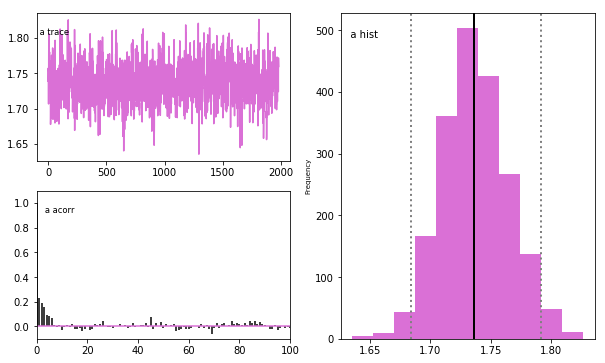

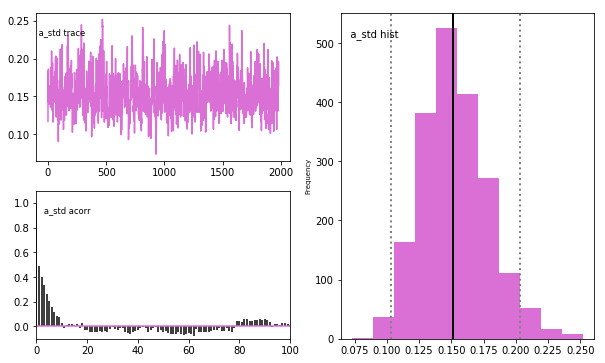

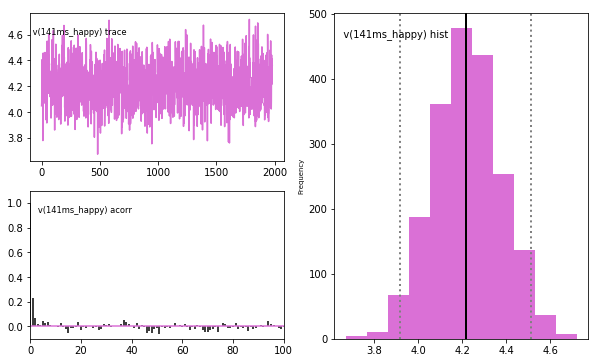

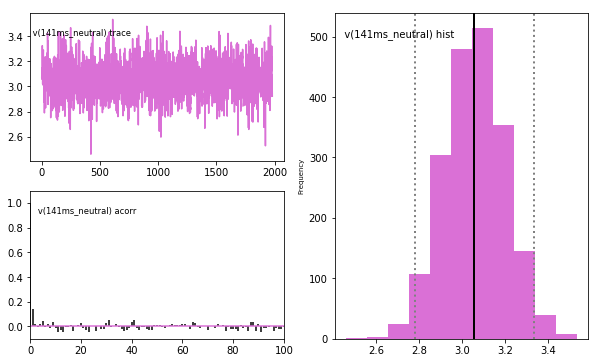

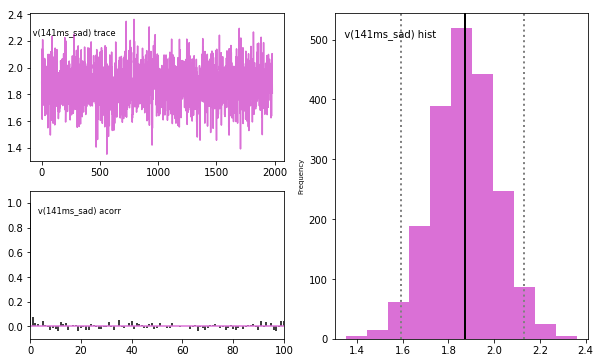

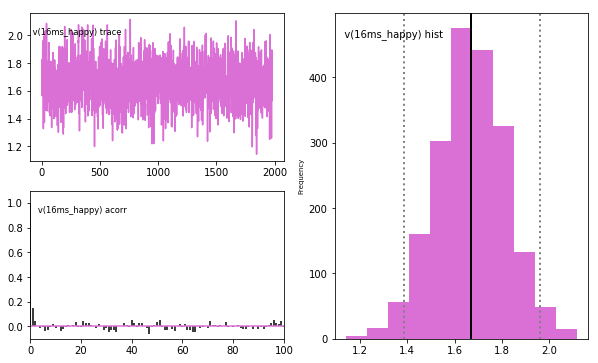

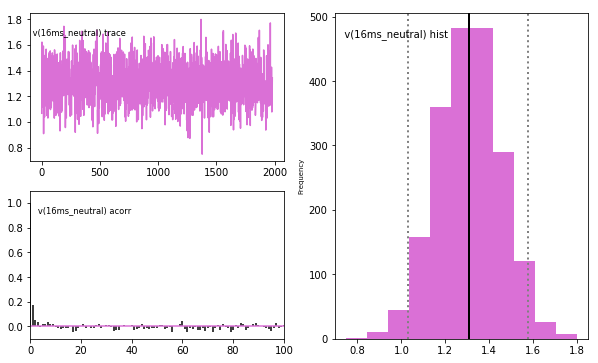

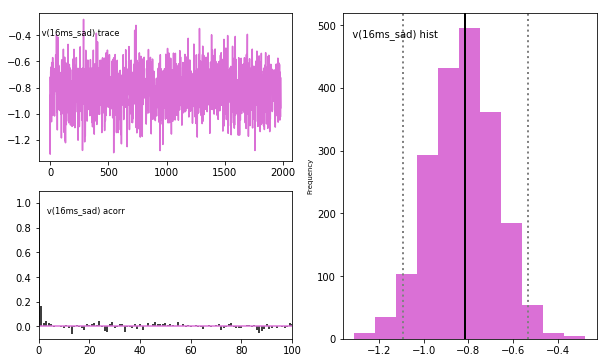

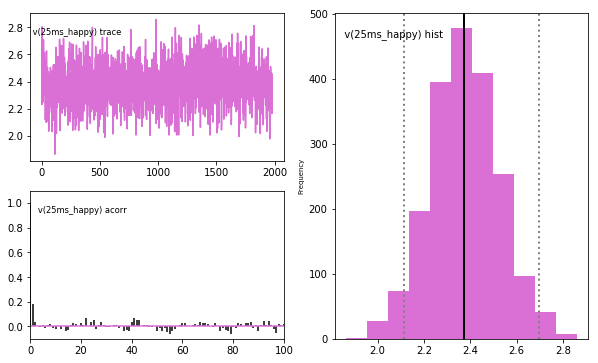

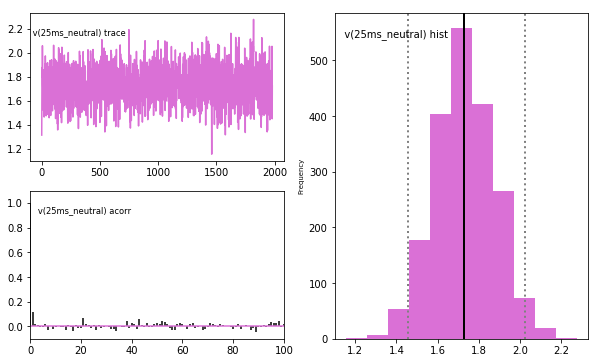

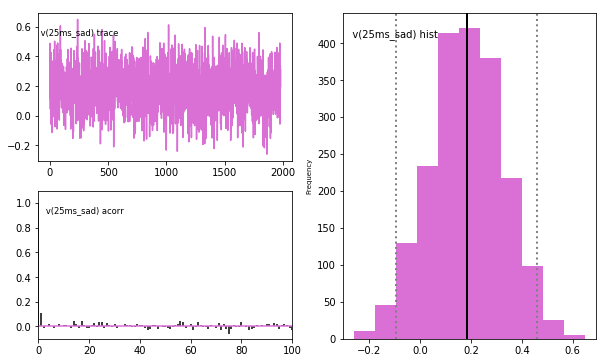

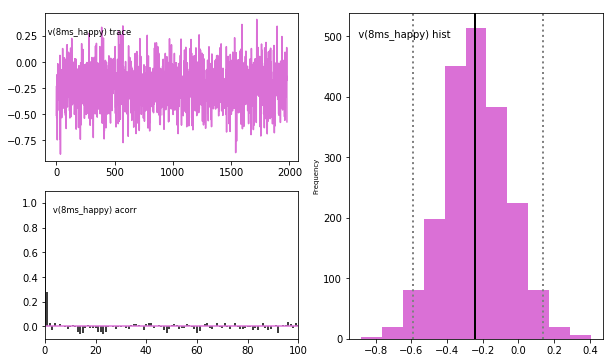

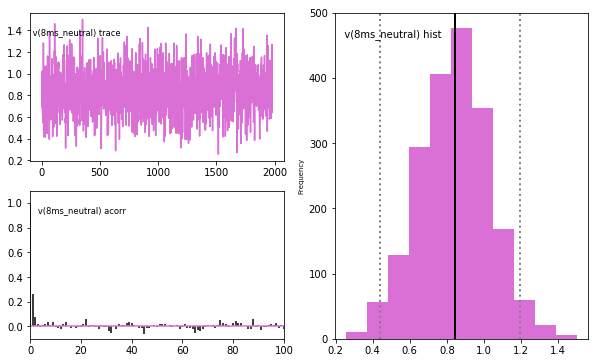

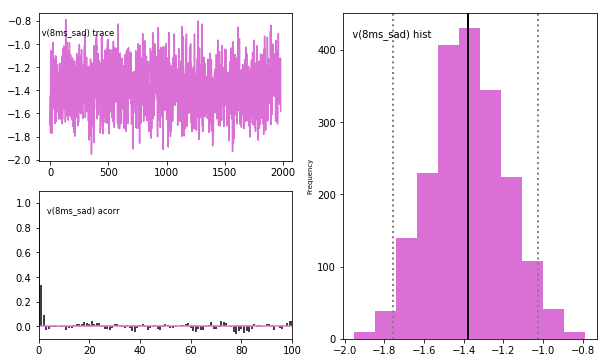

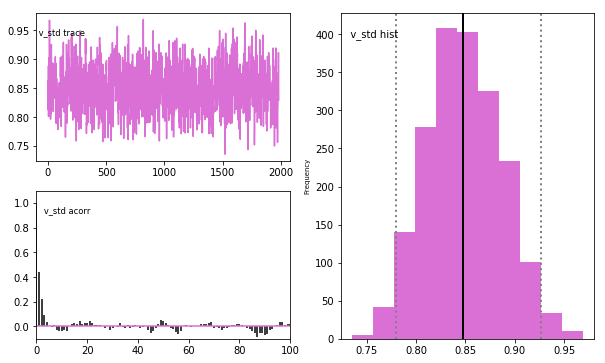

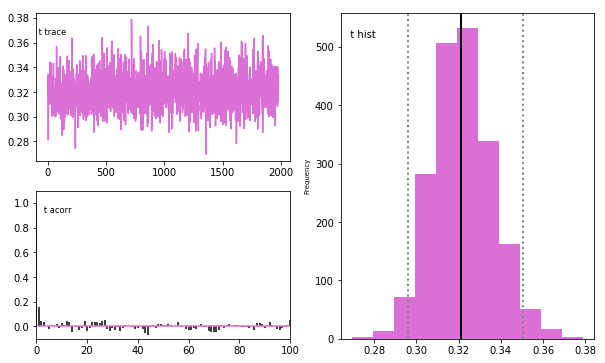

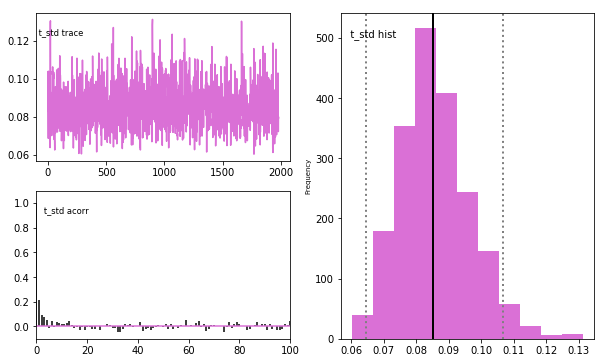

In [59]:
m.plot_posteriors()

In [60]:
m.print_stats()

                                mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                           1.737438  0.027704  1.686316  1.718963  1.736257  1.755643  1.793632  0.000994
a_std                       0.152969  0.025583  0.107768  0.134937  0.151129  0.169019  0.210219  0.001224
a_subj.1.0                  1.775241  0.081039  1.627362  1.718175  1.771815  1.826329  1.950550  0.003889
a_subj.2.0                  1.738631  0.072083  1.602043  1.688632  1.739379  1.791768  1.876295  0.003162
a_subj.3.0                  1.898121  0.089489  1.744806  1.835362  1.891925  1.951716  2.096161  0.004528
a_subj.4.0                  1.685931  0.064326  1.562667  1.641802  1.683636  1.729072  1.816148  0.002604
a_subj.5.0                  1.776415  0.064976  1.659507  1.731469  1.773961  1.819259  1.910331  0.002624
a_subj.6.0                  1.506934  0.055276  1.403543  1.467388  1.507632  1.543831  1.611533  0.002072
a_subj.7.0                  1.749324 

# Plot Drift-Rates for all conditions

In [61]:
import matplotlib.pyplot

(0, 4)

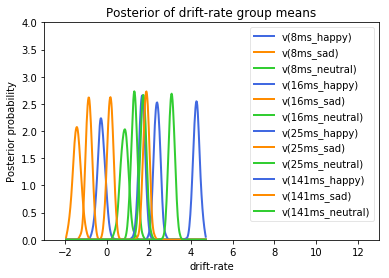

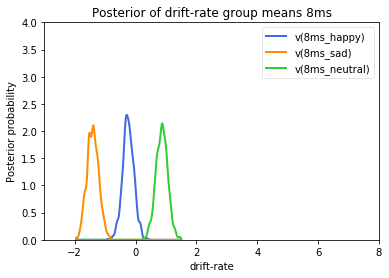

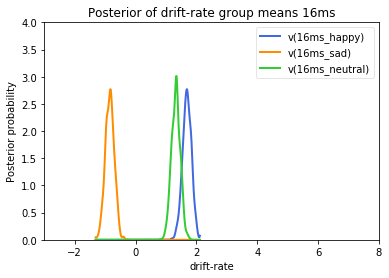

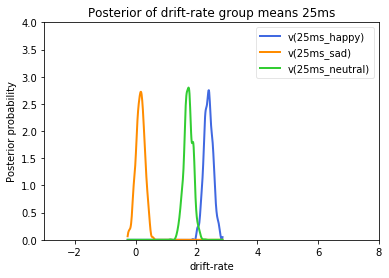

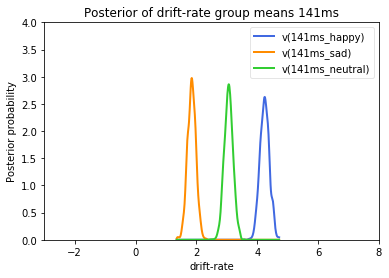

In [107]:
v_8ms_happy, v_8ms_sad, v_8ms_neutral,v_16ms_happy, v_16ms_sad, v_16ms_neutral, v_25ms_happy, v_25ms_sad, v_25ms_neutral, v_141ms_happy, v_141ms_sad, v_141ms_neutral  = m.nodes_db.node[['v(8ms_happy)', 'v(8ms_sad)', 'v(8ms_neutral)','v(16ms_happy)', 'v(16ms_sad)', 'v(16ms_neutral)', 'v(25ms_happy)', 'v(25ms_sad)', 'v(25ms_neutral)', 'v(141ms_happy)', 'v(141ms_sad)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_8ms_sad, v_8ms_neutral,v_16ms_happy, v_16ms_sad, v_16ms_neutral, v_25ms_happy, v_25ms_sad, v_25ms_neutral, v_141ms_happy, v_141ms_sad, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(-3,13)
plt.ylim(0,4)

v_8ms_happy, v_8ms_sad, v_8ms_neutral= m.nodes_db.node[['v(8ms_happy)', 'v(8ms_sad)', 'v(8ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_8ms_sad, v_8ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 8ms')
plt.xlim(-3,8)
plt.ylim(0,4)

v_16ms_happy, v_16ms_sad, v_16ms_neutral= m.nodes_db.node[['v(16ms_happy)', 'v(16ms_sad)', 'v(16ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_16ms_happy, v_16ms_sad, v_16ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 16ms')
plt.xlim(-3,8)
plt.ylim(0,4)

v_25ms_happy, v_25ms_sad, v_25ms_neutral= m.nodes_db.node[['v(25ms_happy)', 'v(25ms_sad)', 'v(25ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_25ms_happy, v_25ms_sad, v_25ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 25ms')
plt.xlim(-3,8)
plt.ylim(0,4)

v_141ms_happy, v_141ms_sad, v_141ms_neutral= m.nodes_db.node[['v(141ms_happy)', 'v(141ms_sad)', 'v(141ms_neutral)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['royalblue','darkorange','limegreen']) +"
                                   "cycler('linestyle', ['-','-','-',])")
hddm.analyze.plot_posterior_nodes([v_141ms_happy, v_141ms_sad, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 141ms')
plt.xlim(-3,8)
plt.ylim(0,4)


(0, 4)

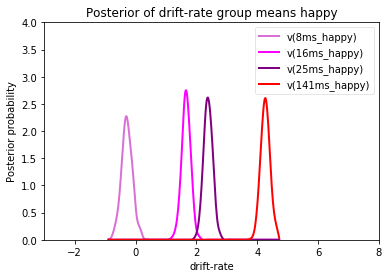

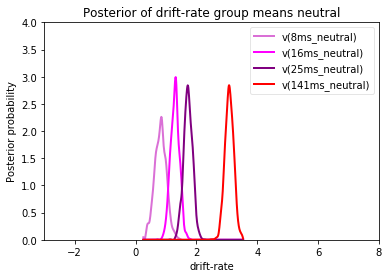

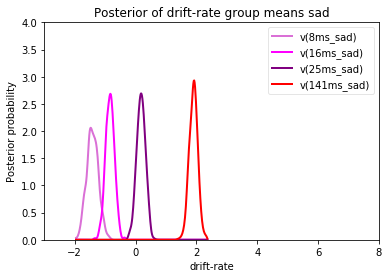

In [63]:
v_8ms_happy, v_16ms_happy, v_25ms_happy, v_141ms_happy= m.nodes_db.node[['v(8ms_happy)', 'v(16ms_happy)', 'v(25ms_happy)', 'v(141ms_happy)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_16ms_happy, v_25ms_happy, v_141ms_happy])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means happy')
plt.xlim(-3,8)
plt.ylim(0,4)


v_8ms_neutral, v_16ms_neutral, v_25ms_neutral, v_141ms_neutral= m.nodes_db.node[['v(8ms_neutral)', 'v(16ms_neutral)', 'v(25ms_neutral)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_neutral, v_16ms_neutral, v_25ms_neutral, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means neutral')
plt.xlim(-3,8)
plt.ylim(0,4)

v_8ms_sad, v_16ms_sad, v_25ms_sad, v_141ms_sad= m.nodes_db.node[['v(8ms_sad)', 'v(16ms_sad)', 'v(25ms_sad)', 'v(141ms_sad)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_sad, v_16ms_sad, v_25ms_sad, v_141ms_sad])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means sad')
plt.xlim(-3,8)
plt.ylim(0,4)


# Get statistics

In [64]:
print "P(8ms_happy > 8ms_sad)=",(v_8ms_happy.trace() > v_8ms_sad.trace()).mean()
print "P(8ms_happy > 8ms_neutral)=",(v_8ms_happy.trace() > v_8ms_neutral.trace()).mean()

print "P(16ms_happy > 16ms_sad)=",(v_16ms_happy.trace() > v_16ms_sad.trace()).mean()
print "P(16ms_happy > 16ms_neutral)=",(v_16ms_happy.trace() > v_16ms_neutral.trace()).mean()

print "P(25ms_happy > 25ms_sad)=",(v_25ms_happy.trace() > v_25ms_sad.trace()).mean()
print "P(25ms_happy > 25ms_neutral)=",(v_25ms_happy.trace() > v_25ms_neutral.trace()).mean()

print "P(141ms_happy > 141ms_sad)=",(v_141ms_happy.trace() > v_141ms_sad.trace()).mean()
print "P(141ms_happy > 141ms_neutral)=",(v_141ms_happy.trace() > v_141ms_neutral.trace()).mean()


print "P(8ms_happy > 16ms_happy)=",(v_8ms_happy.trace() > v_16ms_happy.trace()).mean()
print "P(8ms_happy > 25ms_happy)=",(v_8ms_happy.trace() > v_25ms_happy.trace()).mean()
print "P(8ms_happy > 141ms_happy)=",(v_8ms_happy.trace() > v_141ms_happy.trace()).mean()
print "P(16ms_happy > 25ms_happy)=",(v_16ms_happy.trace() > v_25ms_happy.trace()).mean()
print "P(16ms_happy > 141ms_happy)=",(v_16ms_happy.trace() > v_141ms_happy.trace()).mean()
print "P(25ms_happy > 141ms_happy)=",(v_25ms_happy.trace() > v_141ms_happy.trace()).mean()


print "P(8ms_sad > 16ms_sad)=",(v_8ms_sad.trace() > v_16ms_sad.trace()).mean()
print "P(8ms_sad > 25ms_sad)=",(v_8ms_sad.trace() > v_25ms_sad.trace()).mean()
print "P(8ms_sad > 141ms_sad)=",(v_8ms_sad.trace() > v_141ms_sad.trace()).mean()
print "P(16ms_sad > 25ms_sad)=",(v_16ms_sad.trace() > v_25ms_sad.trace()).mean()
print "P(16ms_sad > 141ms_sad)=",(v_16ms_sad.trace() > v_141ms_sad.trace()).mean()
print "P(25ms_sad > 141ms_sad)=",(v_25ms_sad.trace() > v_141ms_sad.trace()).mean()


print "P(8ms_neutral > 16ms_neutral)=",(v_8ms_neutral.trace() > v_16ms_neutral.trace()).mean()
print "P(8ms_neutral > 25ms_neutral)=",(v_8ms_neutral.trace() > v_25ms_neutral.trace()).mean()
print "P(8ms_neutral > 141ms_neutral)=",(v_8ms_neutral.trace() > v_141ms_neutral.trace()).mean()
print "P(16ms_neutral > 25ms_neutral)=",(v_16ms_neutral.trace() > v_25ms_neutral.trace()).mean()
print "P(16ms_neutral > 141ms_neutral)=",(v_16ms_neutral.trace() > v_141ms_neutral.trace()).mean()
print "P(25ms_neutral > 141ms_neutral)=",(v_25ms_neutral.trace() > v_141ms_neutral.trace()).mean()

P(8ms_happy > 8ms_sad)= 1.0
P(8ms_happy > 8ms_neutral)= 0.0
P(16ms_happy > 16ms_sad)= 1.0
P(16ms_happy > 16ms_neutral)= 0.9606060606060606
P(25ms_happy > 25ms_sad)= 1.0
P(25ms_happy > 25ms_neutral)= 0.9994949494949495
P(141ms_happy > 141ms_sad)= 1.0
P(141ms_happy > 141ms_neutral)= 1.0
P(8ms_happy > 16ms_happy)= 0.0
P(8ms_happy > 25ms_happy)= 0.0
P(8ms_happy > 141ms_happy)= 0.0
P(16ms_happy > 25ms_happy)= 0.0
P(16ms_happy > 141ms_happy)= 0.0
P(25ms_happy > 141ms_happy)= 0.0
P(8ms_sad > 16ms_sad)= 0.00909090909090909
P(8ms_sad > 25ms_sad)= 0.0
P(8ms_sad > 141ms_sad)= 0.0
P(16ms_sad > 25ms_sad)= 0.0
P(16ms_sad > 141ms_sad)= 0.0
P(25ms_sad > 141ms_sad)= 0.0
P(8ms_neutral > 16ms_neutral)= 0.022727272727272728
P(8ms_neutral > 25ms_neutral)= 0.0
P(8ms_neutral > 141ms_neutral)= 0.0
P(16ms_neutral > 25ms_neutral)= 0.014141414141414142
P(16ms_neutral > 141ms_neutral)= 0.0
P(25ms_neutral > 141ms_neutral)= 0.0


# Estimate Main Effects

# Model for drift-rate depending on main effects
### Gelman Rubin R Statistic for convergence check

In [72]:
#Gelman Rubin R statistic 
models = list()
for i in range(5):
    model_stim = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'stim'})    #, depends_on={'v': 'stim'})
    model_stim.find_starting_values()
    model_stim.sample(2000, burn=20, dbname='v_stim.db',db='pickle')  
    models.append(model_stim)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains



 [-----------------100%-----------------] 2001 of 2000 complete in 270.5 sec

{'a': 1.000154537000427,
 'a_std': 0.9998348400417459,
 'a_subj.1.0': 1.001606727306388,
 'a_subj.10.0': 1.0006064018450394,
 'a_subj.11.0': 1.0000566318274249,
 'a_subj.14.0': 1.0009586577512182,
 'a_subj.15.0': 0.999937633990505,
 'a_subj.16.0': 1.000157567123995,
 'a_subj.17.0': 0.9998474822650311,
 'a_subj.18.0': 1.0007154304166883,
 'a_subj.2.0': 1.0008444461856734,
 'a_subj.20.0': 1.0003185773541874,
 'a_subj.21.0': 1.0000851577245387,
 'a_subj.22.0': 1.000158152517115,
 'a_subj.24.0': 1.0001958565023068,
 'a_subj.25.0': 1.0001981235610669,
 'a_subj.27.0': 1.0012536257723779,
 'a_subj.28.0': 1.0010936865941775,
 'a_subj.29.0': 1.0004412359763382,
 'a_subj.3.0': 1.000272792837748,
 'a_subj.30.0': 1.0005231882047545,
 'a_subj.32.0': 1.0000591053680208,
 'a_subj.33.0': 1.0004676729753361,
 'a_subj.34.0': 1.0005456397857888,
 'a_subj.36.0': 1.0002678465266321,
 'a_subj.37.0': 1.0000132509267914,
 'a_subj.38.0': 1.0003953860050556,
 'a_subj.39.0': 1.0007259816642768,
 'a_subj.4.0': 1.

In [73]:
model_stim.save('v_stim')

In [74]:
#Gelman Rubin R statistic 
models = list()
for i in range(5):
    model_level = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'level'})    #, depends_on={'v': 'stim'})
    model_level.find_starting_values()
    model_level.sample(2000, burn=20, dbname='v_level.db',db='pickle') 
    models.append(model_level)
hddm.analyze.gelman_rubin(models) #Check for convergence within and between chains


 [-----------------100%-----------------] 2001 of 2000 complete in 283.9 sec

{'a': 1.0001500719428806,
 'a_std': 1.0001732506228849,
 'a_subj.1.0': 1.0001284110376838,
 'a_subj.10.0': 1.0020227463219755,
 'a_subj.11.0': 1.0002162615847754,
 'a_subj.14.0': 1.0009855998548711,
 'a_subj.15.0': 0.999869023933067,
 'a_subj.16.0': 1.0005942753832326,
 'a_subj.17.0': 0.999983512821041,
 'a_subj.18.0': 0.9999810961340142,
 'a_subj.2.0': 1.0003302657023254,
 'a_subj.20.0': 1.0028236526274963,
 'a_subj.21.0': 1.0006227045498761,
 'a_subj.22.0': 0.9998223034041196,
 'a_subj.24.0': 0.9998018859791402,
 'a_subj.25.0': 1.0007345122012825,
 'a_subj.27.0': 1.0011507512028128,
 'a_subj.28.0': 1.001151687309881,
 'a_subj.29.0': 0.9998464640407411,
 'a_subj.3.0': 0.9998132258804814,
 'a_subj.30.0': 0.9998122261113456,
 'a_subj.32.0': 1.000604885432385,
 'a_subj.33.0': 1.0005940110363893,
 'a_subj.34.0': 1.0013065575270839,
 'a_subj.36.0': 1.000301672596447,
 'a_subj.37.0': 0.9998500906844302,
 'a_subj.38.0': 1.0005575793849009,
 'a_subj.39.0': 1.0014238659968497,
 'a_subj.4.0': 1

In [75]:
model_level.save('v_level')

Plotting a
Plotting a_std
Plotting v(happy)
Plotting v(neutral)
Plotting v(sad)
Plotting v_std
Plotting t
Plotting t_std


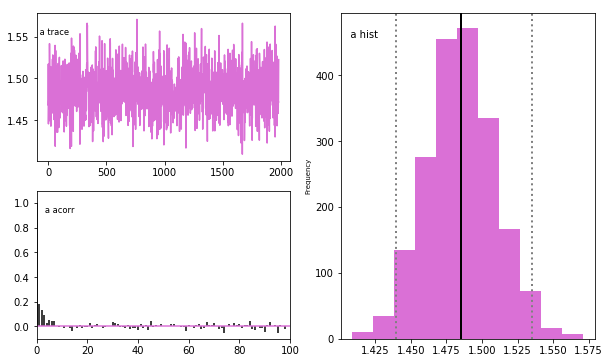

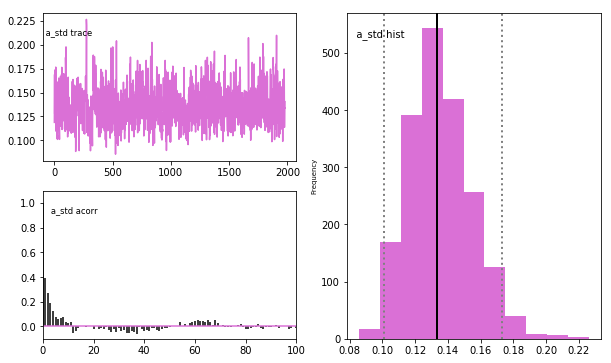

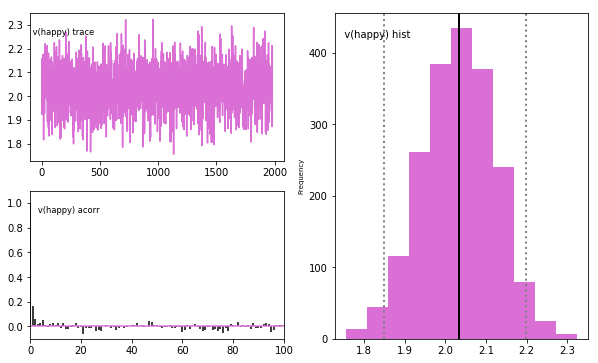

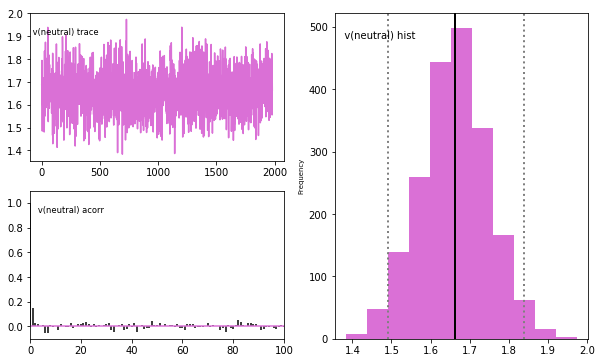

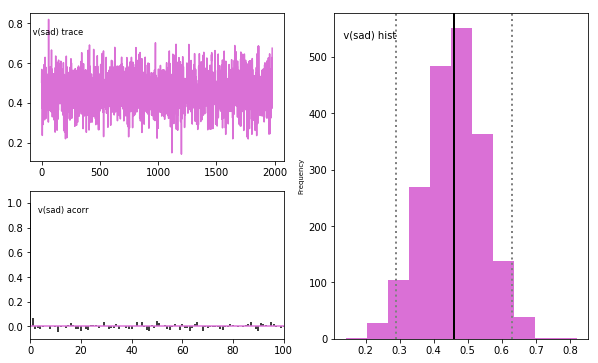

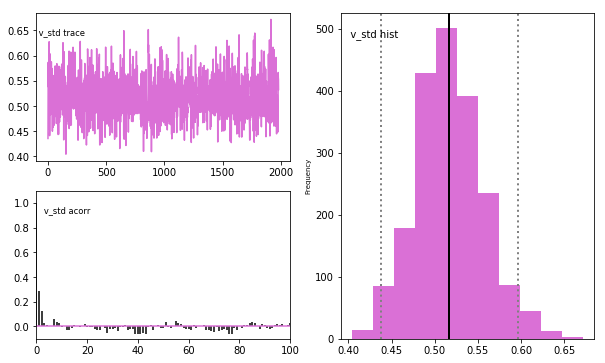

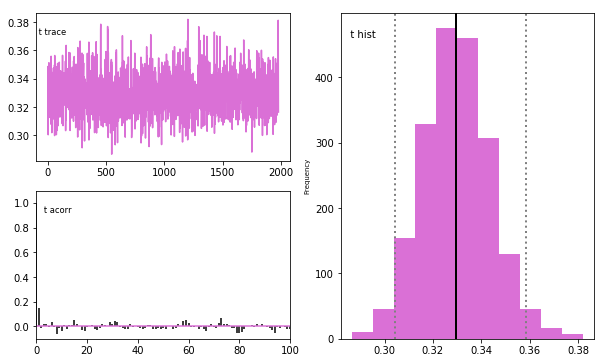

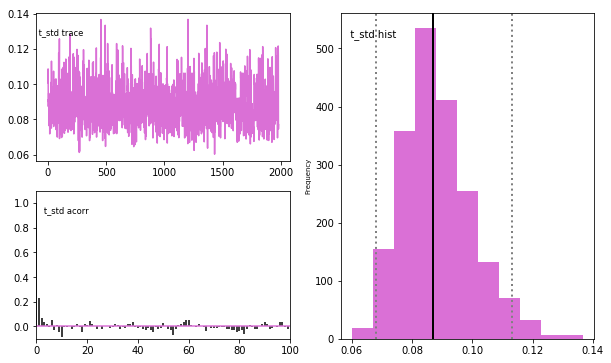

In [76]:
model_stim.plot_posteriors()

In [77]:
model_stim.print_stats()

                          mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                     1.485477  0.024286  1.438879  1.469084  1.485156  1.500978  1.534735  0.000746
a_std                 0.135487  0.019457  0.103151  0.121625  0.133444  0.147271  0.176614  0.000795
a_subj.1.0            1.336555  0.038469  1.261594  1.311244  1.335880  1.362279  1.412632  0.001260
a_subj.2.0            1.461173  0.048410  1.364994  1.428848  1.462167  1.493219  1.553990  0.002048
a_subj.3.0            1.535580  0.049973  1.438953  1.501074  1.536793  1.569696  1.636736  0.001657
a_subj.4.0            1.562000  0.053113  1.458686  1.525895  1.561833  1.597702  1.667668  0.002128
a_subj.5.0            1.419483  0.037754  1.348436  1.393291  1.417489  1.445356  1.496698  0.001216
a_subj.6.0            1.240038  0.038568  1.168410  1.212999  1.240087  1.265225  1.316530  0.001247
a_subj.7.0            1.587821  0.059165  1.480316  1.547322  1.585262  1.627607  1.710447 

Plotting a
Plotting a_std
Plotting v(141ms)
Plotting v(16ms)
Plotting v(25ms)
Plotting v(8ms)
Plotting v_std
Plotting t
Plotting t_std


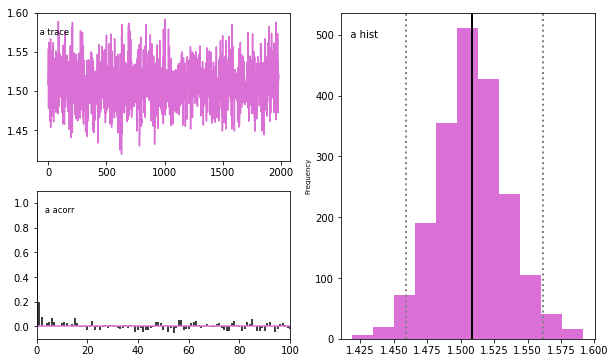

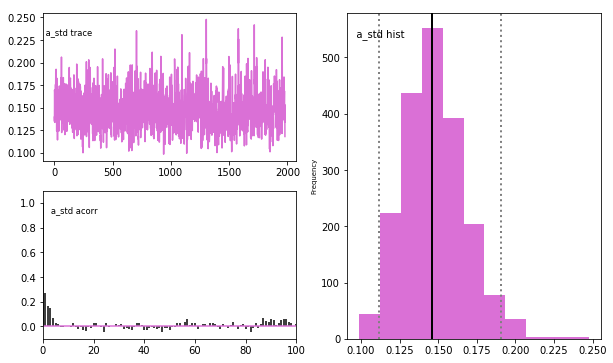

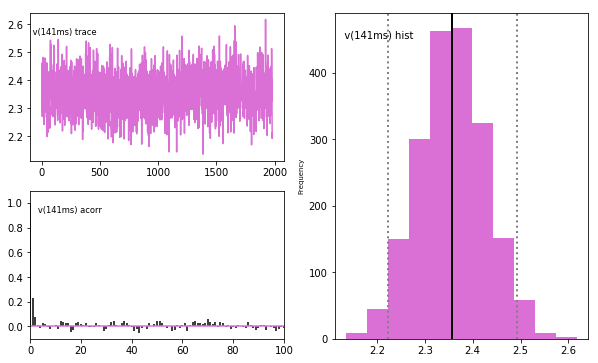

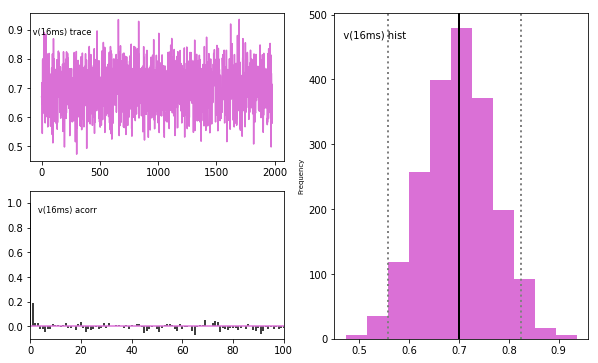

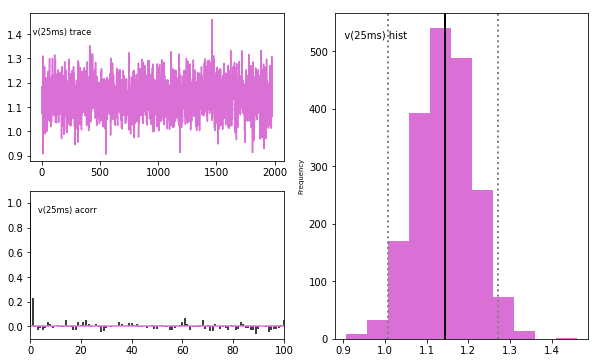

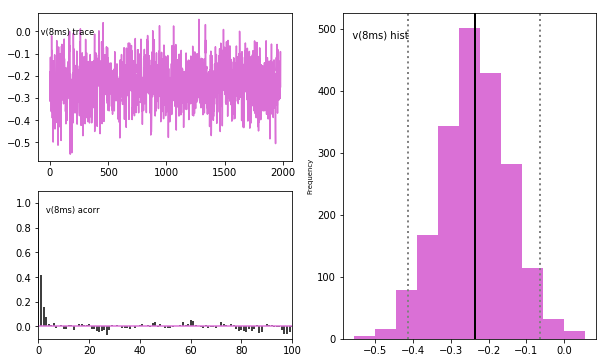

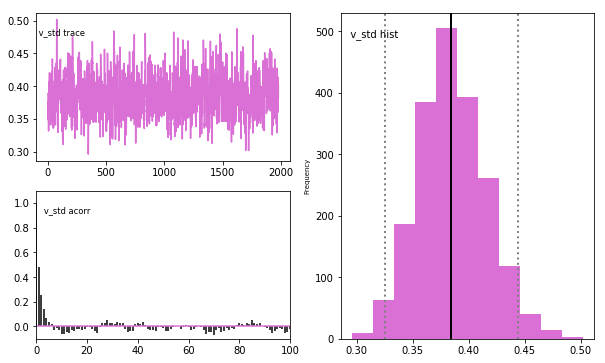

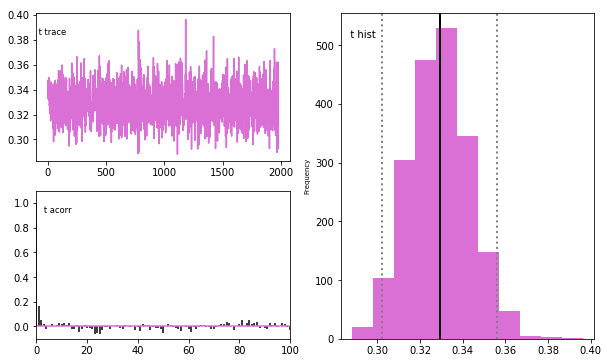

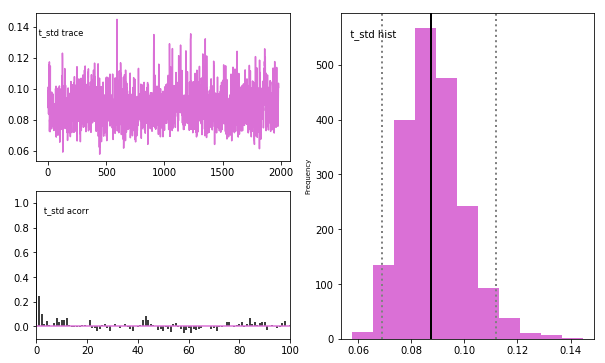

In [78]:
model_level.plot_posteriors()

In [79]:
model_level.print_stats()

                        mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                   1.508606  0.025742  1.458671  1.492109  1.508197  1.525020  1.561370  0.000844
a_std               0.147739  0.020369  0.113297  0.134040  0.145852  0.160078  0.193251  0.000682
a_subj.1.0          1.416251  0.043801  1.330881  1.386581  1.416308  1.446057  1.500279  0.001564
a_subj.2.0          1.589011  0.057059  1.475975  1.551455  1.589443  1.627120  1.701347  0.002336
a_subj.3.0          1.587044  0.053488  1.486959  1.550085  1.586050  1.622027  1.697268  0.002003
a_subj.4.0          1.572101  0.057115  1.465701  1.531245  1.570631  1.610326  1.689058  0.002073
a_subj.5.0          1.578339  0.050289  1.485125  1.545256  1.576552  1.609874  1.680442  0.001756
a_subj.6.0          1.310100  0.043158  1.225523  1.280983  1.310154  1.337491  1.398015  0.001549
a_subj.7.0          1.626498  0.058722  1.520025  1.585498  1.625867  1.663631  1.747797  0.002285
a_subj.8.0

# Plot drift-rate for main effects

In [80]:
import matplotlib.pyplot

(0, 6)

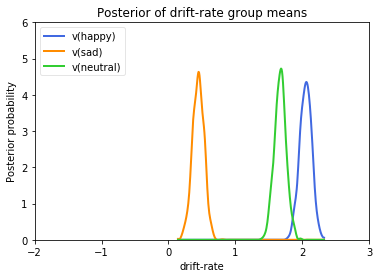

In [105]:
v_happy, v_sad, v_neutral = model_stim.nodes_db.node[['v(happy)', 'v(sad)', 'v(neutral)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['royalblue','darkorange','limegreen']) +"
                                   "cycler('linestyle', ['-','-','-',])")
hddm.analyze.plot_posterior_nodes([v_happy, v_sad, v_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(-2,3)
plt.ylim(0,6)

(0, 6)

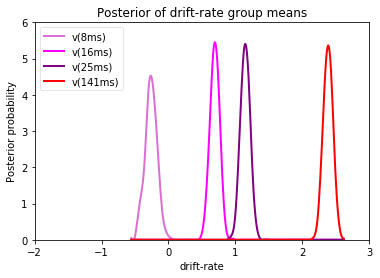

In [82]:
v_8ms, v_16ms, v_25ms, v_141ms = model_level.nodes_db.node[['v(8ms)', 'v(16ms)', 'v(25ms)', 'v(141ms)']] 
plt.rcParams['axes.prop_cycle'] = ("cycler('color', ['orchid','magenta','purple','red']) +"
                                   "cycler('linestyle', ['-','-','-','-',])")
hddm.analyze.plot_posterior_nodes([v_8ms, v_16ms, v_25ms, v_141ms])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(-2,3)
plt.ylim(0,6)

# Get Statistics

In [83]:
print "P(happy > sad)=",(v_happy.trace() > v_sad.trace()).mean()
print "P(sad > happy)=",(v_sad.trace() > v_happy.trace()).mean()
print "P(happy > neutral)=",(v_happy.trace() > v_neutral.trace()).mean()
print "P(sad > neutral)=",(v_sad.trace() > v_neutral.trace()).mean()

P(happy > sad)= 1.0
P(sad > happy)= 0.0
P(happy > neutral)= 0.9984848484848485
P(sad > neutral)= 0.0


In [84]:
print "P(8ms > 16ms) =",(v_8ms.trace() > v_16ms.trace()).mean()
print "P(8ms > 25ms) =",(v_8ms.trace() > v_25ms.trace()).mean()
print "P(16ms > 25ms) =",(v_16ms.trace() > v_25ms.trace()).mean()
print "P(25ms > 141ms) =",(v_25ms.trace() > v_141ms.trace()).mean()
print "P(16ms > 141ms) =",(v_16ms.trace() > v_141ms.trace()).mean()
print "P(8ms > 141ms) =",(v_8ms.trace() > v_141ms.trace()).mean()

P(8ms > 16ms) = 0.0
P(8ms > 25ms) = 0.0
P(16ms > 25ms) = 0.0
P(25ms > 141ms) = 0.0
P(16ms > 141ms) = 0.0
P(8ms > 141ms) = 0.0
